#### Analyst: Dhruv Singh <br> Report Name: Success Classifier, Phase 1.2: Graphs <br> Report Quarter, Year: FY 2011-2021 <br> Date Updated: 10/23/2021

# Phase I. B: Graphs

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
# Read in data
df = pd.read_csv('2_data/1_cleaned_data.csv')
df.head()

,StateId,ProgramTitle,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,...,Race_White,ActualstartDate,ActualEndDate,EmpName,Employed,Length,StartMonth,StartYear,EndMonth,EndYear
0,20,Transitional Employment Program (Way to Work),40,0,1,1,11,0,0,0,...,0,2018-03-23,2018-03-23,Helix Electric,1,0,3,2018,3,2018
1,20,Transitional Employment Program (Way to Work),40,0,1,1,11,0,0,0,...,0,2019-10-25,2019-10-25,Helix Electric,1,0,10,2019,10,2019
2,34,DC Infrastructure Academy,50,0,1,1,14,0,0,0,...,0,2019-08-27,2019-08-28,0,0,1,8,2019,8,2019
3,34,Transitional Employment Program (Way to Work),50,0,1,1,14,0,0,0,...,0,2012-07-20,2012-07-20,0,0,0,7,2012,7,2012
4,58,Title I - Workforce Development (WIOA),53,0,1,1,14,0,0,0,...,0,2016-07-21,2016-07-21,0,0,0,7,2016,7,2016


In [3]:
# dropping date columns
df = df.drop(['ActualstartDate', 'ActualEndDate'], axis=1)

In [4]:
df.dtypes

StateId                  int64
ProgramTitle            object
Age_AtReg                int64
Disability               int64
Gender                   int64
CitizenStatus            int64
EducationLevel           int64
Race_Hispanic            int64
Race_NativeAmerican      int64
Race_Asian               int64
Race_AfricanAmerican     int64
Race_PacificIslander     int64
Race_White               int64
EmpName                 object
Employed                 int64
Length                   int64
StartMonth               int64
StartYear                int64
EndMonth                 int64
EndYear                  int64
dtype: object

### Part 1: Customer Approaches: Demographics

In [5]:
df.shape

(38263, 20)

In [6]:
# services are inflated, and need to be readjusted for story
df1 = df.sort_values(by=["StateId", "StartYear"])
# df1 = df.sort_values(by=["StateId", "ProgramTitle", "StartYear"])

In [7]:
# dropping dups, keeping 1 rows for each approach and program enrollment.
df1 = df1.drop_duplicates(subset = ["StateId"], keep='first')
# df1 = df1.drop_duplicates(subset = ["StateId", "ProgramTitle"], keep='first')
# keep program title if you want to measure program enrollment yearly trends

##### Graph 1: New Enrollments

In [8]:
df1.shape

(23084, 20)

In [9]:
# creating enrollments table
df1_enrollments = df1[['StartYear', 'StateId']].groupby('StartYear').count()

In [10]:
df1_enrollments

,StateId
StartYear,
2011,2915
2012,2109
2013,1597
2014,1025
2015,1834
2016,2288
2017,2389
2018,3294
2019,4027


In [11]:
df1_enrollments = df1_enrollments.rename(columns = {"StateId": "Enrollments"})
df1_enrollments

,Enrollments
StartYear,
2011,2915
2012,2109
2013,1597
2014,1025
2015,1834
2016,2288
2017,2389
2018,3294
2019,4027


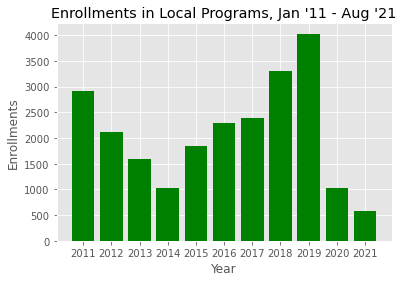

In [15]:
plt.style.use('ggplot')

x = df1_enrollments.index.tolist()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, df1_enrollments['Enrollments'], color='green')
plt.xlabel("Year")
plt.ylabel("Enrollments")
plt.title("Enrollments in Local Programs, Jan '11 - Aug '21")

plt.xticks(x_pos, x)

plt.savefig('3_graphs/1.1_local_enrollments.png', dpi=300, bbox_inches='tight')
plt.show()

##### Graph 2: Demographic 1: Age

In [26]:
# creating enrollments table
df1_age = df1[['Age_AtReg', 'StateId']].groupby('Age_AtReg').count()

In [27]:
df1_age

,StateId
Age_AtReg,
0,94
14,39
15,78
16,186
17,310
...,...
76,1
77,2
78,1


In [28]:
df1_age = df1_age.rename(columns = {"StateId": "Enrollments"})
df1_age

,Enrollments
Age_AtReg,
0,94
14,39
15,78
16,186
17,310
...,...
76,1
77,2
78,1


In [29]:
df1_age = df1_age.reset_index()

In [30]:
df1_age = df1_age[df1_age.Age_AtReg != 0]

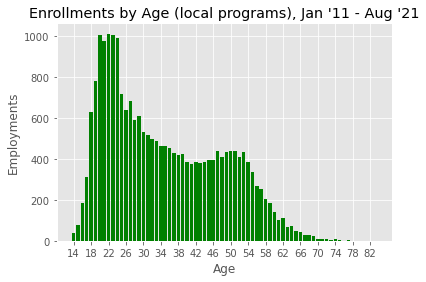

In [54]:
# creating plot
plt.figure()
plt.bar(df1_age['Age_AtReg'], df1_age['Enrollments'], color='green');
#plt.legend();
plt.title("Enrollments by Age (local programs), Jan '11 - Aug '21");
plt.xlabel('Age')
plt.ylabel("Employments")
plt.xticks(np.arange(min(x), max(x)+1, 4.0));
plt.savefig('3_graphs/1.2_enrollments_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

##### Graph 3: Demographic 2: Gender

In [45]:
# creating enrollments table
df1_gender = df1[['StartYear', 'Gender', 'StateId']].groupby(['StartYear', 'Gender']).count()

In [46]:
df1_gender = df1_gender.reset_index()

In [47]:
df1_gender = df1_gender[df1_gender.Gender != 0]

In [48]:
df1_gender = df1_gender.pivot_table(index='StartYear', columns = 'Gender', values = 'StateId').reset_index()

In [49]:
df1_gender = df1_gender.set_index('StartYear')

In [52]:
# renaming columns
df1_gender = df1_gender.rename(columns = {1: "Male",
                                          2: "Female"})

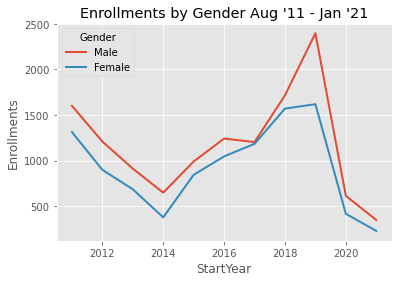

In [65]:
## comparing enrollment numbers
df1_gender.plot(kind='line', linewidth=2)
#plt.xticks(rotation=45)
plt.title("Enrollments by Gender Aug '11 - Jan '21")
plt.ylabel("Enrollments")
plt.savefig('3_graphs/1.3_enrollments_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

##### Graph 4: Demographic 3: Race

In [59]:
# renaming columns
df1 = df1.rename(columns = {"Race_Hispanic": "Hispanic",
                            "Race_NativeAmerican": "NativeAmerican",
                            "Race_Asian": "Asian",
                            "Race_AfricanAmerican": "AfricanAmerican",
                            "Race_PacificIslander": "PacificIslander",
                            "Race_White": "White"})

In [60]:
df1_race = df1[['StartYear', 'StateId', 'Hispanic', 'NativeAmerican', 'Asian', 'AfricanAmerican', 'PacificIslander', 'White']]

In [61]:
# creating enrollments table
df1_race = df1_race[['StartYear', 'Hispanic', 'NativeAmerican', 'Asian', 'PacificIslander', 'White']].groupby(['StartYear']).sum()

In [62]:
df1_race

,Hispanic,NativeAmerican,Asian,PacificIslander,White
StartYear,,,,,
2011,73,39,17,8,98
2012,41,19,10,4,52
2013,36,23,4,0,27
2014,12,11,1,0,16
2015,31,19,9,3,59
2016,33,31,19,4,72
2017,43,34,7,6,60
2018,60,47,19,9,71
2019,87,70,21,14,115


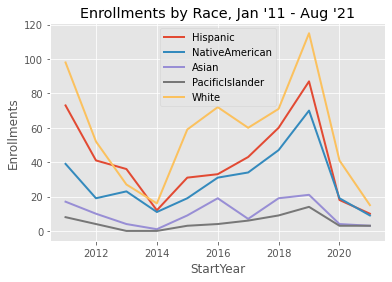

In [67]:
## comparing enrollment numbers
df1_race.plot(kind='line', linewidth=2)
#plt.xticks(rotation=45)
plt.title("Enrollments by Race, Jan '11 - Aug '21")
plt.ylabel("Enrollments")
plt.savefig('3_graphs/1.4_enrollments_by_race.png', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
# creating enrollments table
df1_race2 = df1[['StartYear', 'AfricanAmerican']].groupby(['StartYear']).sum()

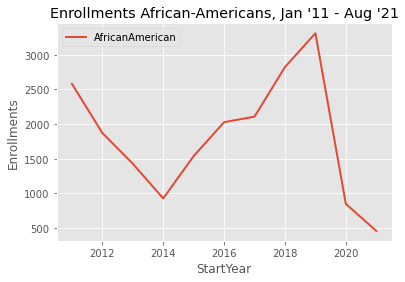

In [69]:
## comparing enrollment numbers
df1_race2.plot(kind='line', linewidth=2)
#plt.xticks(rotation=45)
plt.title("Enrollments African-Americans, Jan '11 - Aug '21")
plt.ylabel("Enrollments")
plt.savefig('3_graphs/1.5_enrollments_by_race.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# add in stacked bar with percentages by race, final draft

In [ ]:
# separate chart for african americans because they're on a whole separate scale

# can choose to do a stacked bar if it has more explanatory power in addition

##### Graph 5: Demographic 4: Citizenship

In [81]:
# creating enrollments table
df1_citizenship = df1[['StartYear', 'CitizenStatus', 'StateId']].groupby(['StartYear', 'CitizenStatus']).count()

In [82]:
df1_citizenship

StateId
StartYear CitizenStatus         
2011      1                 2789
          2                   77
          3                   38
          4                   11
2012      1                 2033
          2                   48
          3                   19
          4                    9
2013      1                 1547
          2                   26
          3                   22
          4                    2
2014      1                 1006
          2                   15
          3                    4
2015      1                 1781
          2                   34
          3                   14
          4                    5
2016      1                 2223
          2                   37
          3                   18
          4                   10
2017      1                 2334
          2                   43
          3                   12
2018      1                 3178
          2                   45
          3                   30
          4                   41
2019      1                 3879
          2                   63
          3                   38
          4                   47
2020      1                  989
          2                   18
          3                   11
          4                   11
2021      1                  558
          2                   11
          3                    3
          4                    5

In [83]:
df1_citizenship = df1_citizenship.reset_index()

In [84]:
# again, as before with african americans
# citizens are on a whole nother scale. and need to be plotted separately
# again, a stacked bar may be in order
df2_citizenship = df1_citizenship[df1_citizenship.CitizenStatus == 1]
df1_citizenship = df1_citizenship[(df1_citizenship.CitizenStatus != 1) & (df1_citizenship.CitizenStatus != 4)]

In [85]:
df1_citizenship = df1_citizenship.pivot_table(index='StartYear', columns = 'CitizenStatus', values = 'StateId').reset_index()
df2_citizenship = df2_citizenship.pivot_table(index='StartYear', columns = 'CitizenStatus', values = 'StateId').reset_index()

In [86]:
# renaming columns
df2_citizenship = df2_citizenship.rename(columns = {1: "Citizen"})

df1_citizenship = df1_citizenship.rename(columns = {2: "Resident",
                                                    3: "Alien"})

In [87]:
df1_citizenship = df1_citizenship.set_index('StartYear')
df2_citizenship = df2_citizenship.set_index('StartYear')

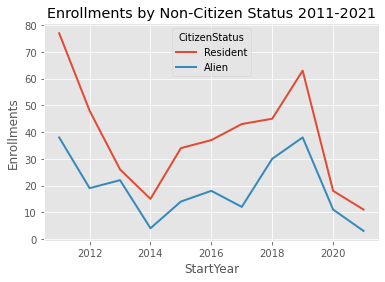

In [88]:
## comparing enrollment numbers
df1_citizenship.plot(kind='line', linewidth=2)
#plt.xticks(rotation=45)
plt.title("Enrollments by Non-Citizen Status 2011-2021")
plt.ylabel("Enrollments")
plt.savefig('3_graphs/1.6_enrollments_by_citizen_status.png', dpi=300, bbox_inches='tight')
plt.show()

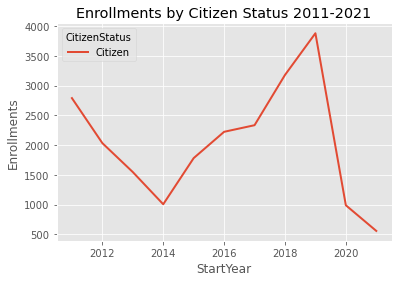

In [89]:
## comparing enrollment numbers
df2_citizenship.plot(kind='line', linewidth=2)
#plt.xticks(rotation=45)
plt.title("Enrollments by Citizen Status 2011-2021")
plt.ylabel("Enrollments")
plt.savefig('3_graphs/1.7_enrollments_by_citizen_status.png', dpi=300, bbox_inches='tight')
plt.show()

##### Graph 6: Demographic 5: Education

In [120]:
# creating enrollments table
df1_educ = df1[['EducationLevel', 'StateId']].groupby('EducationLevel').count()

In [121]:
df1_educ = df1_educ.rename(columns = {"StateId": "Enrollments"})
df1_educ

,Enrollments
EducationLevel,
0,460
1,7
2,9
3,9
4,7
5,5
6,36
7,92
8,207


In [122]:
df1_educ = df1_educ.sort_values(by=['Enrollments'])

In [123]:
df1_educ = df1_educ.reset_index()

In [124]:
df1_educ = df1_educ[df1_educ.EducationLevel >= 9]

In [125]:
# renaming educational level categories

df1_educ.loc[df1_educ.EducationLevel == 9, 'EducationLevel'] = '9th Grade'
df1_educ.loc[df1_educ.EducationLevel == 10, 'EducationLevel'] = '10th Grade'
df1_educ.loc[df1_educ.EducationLevel == 11, 'EducationLevel'] = '11th Grade'
df1_educ.loc[df1_educ.EducationLevel == 12, 'EducationLevel'] = '12th, no dipl.'

df1_educ.loc[df1_educ.EducationLevel == 13, 'EducationLevel'] = 'GED or equivalent'
df1_educ.loc[df1_educ.EducationLevel == 14, 'EducationLevel'] = 'HS Diploma'

df1_educ.loc[df1_educ.EducationLevel == 15, 'EducationLevel'] = 'HS + 1yr Technical'
df1_educ.loc[df1_educ.EducationLevel == 16, 'EducationLevel'] = 'HS + 2yr Technical'
df1_educ.loc[df1_educ.EducationLevel == 17, 'EducationLevel'] = 'HS + 3yr Technical'

df1_educ.loc[df1_educ.EducationLevel == 18, 'EducationLevel'] = 'Technical Certificate'
df1_educ.loc[df1_educ.EducationLevel == 19, 'EducationLevel'] = 'Associates Degree'
df1_educ.loc[df1_educ.EducationLevel == 20, 'EducationLevel'] = "Bachelor's Degree"
df1_educ.loc[df1_educ.EducationLevel == 21, 'EducationLevel'] = "Bachelor's and beyond"

In [126]:
df1_educ = df1_educ.set_index('EducationLevel')

In [127]:
df1_educ

,Enrollments
EducationLevel,
"12th, no dipl.",335
9th Grade,447
Associates Degree,490
HS + 3yr Technical,668
10th Grade,819
Bachelor's and beyond,978
Technical Certificate,979
11th Grade,1103
HS + 2yr Technical,1536


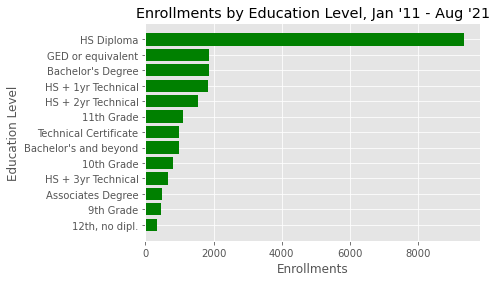

In [130]:
plt.style.use('ggplot')

y = df1_educ.index.tolist()

y_pos = [i for i, _ in enumerate(y)]

plt.barh(y_pos, df1_educ['Enrollments'], color='green')
plt.xlabel("Enrollments")
plt.ylabel("Education Level")
plt.title("Enrollments by Education Level, Jan '11 - Aug '21")

plt.yticks(y_pos, y)

plt.ylim

plt.savefig('3_graphs/1.8_enrollments_by_education.png', dpi=300, bbox_inches='tight')
plt.show()